In [1]:
import pandas as pd
import numpy as np
import scipy.stats as s
import datetime
import json

/Applications/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
curated_data = pd.read_csv('../data/curated_data.csv')

<Axes: xlabel='date'>

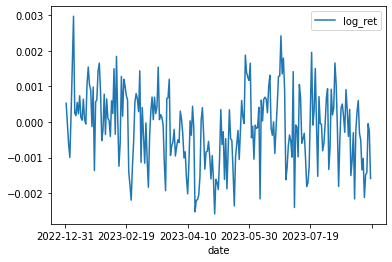

In [3]:
daily_data = curated_data.groupby('date').mean()
daily_data[['log_ret']].plot()

<Axes: xlabel='date'>

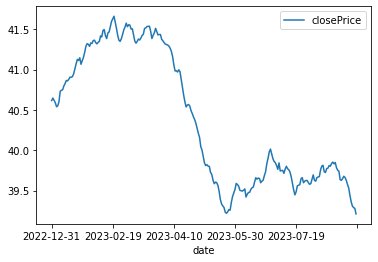

In [4]:
daily_data[['closePrice']].plot()

<Axes: xlabel='date'>

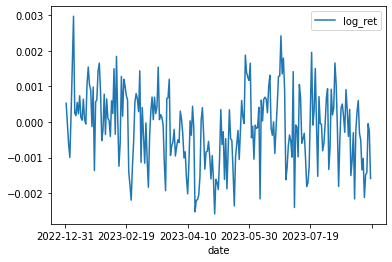

In [5]:
daily_data[['log_ret']].plot()

In [15]:
stocks_std_above_1 = list()
stocks_std_above_1_5 = list()
stocks_std_below_1 = list()
stocks_std_below_1_5 = list()

for stock in range(50):
    stock_ret = curated_data[curated_data['stock'] == stock]['closePrice']

    print(stock, ':', np.mean(stock_ret), np.std(stock_ret), s.skew(stock_ret))

    if np.std(stock_ret) > 1:
        stocks_std_above_1.append(stock)

        if np.std(stock_ret) > 1.5:
            stocks_std_above_1_5.append(stock)

    if np.std(stock_ret) < 1.5:
        stocks_std_below_1_5.append(stock)
    
        if np.std(stock_ret) < 1:
            stocks_std_below_1.append(stock)

0 : 61.74791999999998 1.603090163902206 -0.25865843820019796
1 : 10.437000000000005 0.35146351161962736 0.09649516211345106
2 : 44.76452000000002 2.0446149685454227 -0.010531091477273156
3 : 32.851479999999995 0.5570513527494573 0.1002160393534084
4 : 58.12083999999998 1.6664274644880286 0.39736713872065105
5 : 45.307640000000006 2.8966691958868895 -0.15649452230257868
6 : 54.509519999999995 2.3244092087237993 0.19100688811637034
7 : 43.86656 3.0306637171418402 -0.06476811804870582
8 : 32.9688 0.7628180385911179 0.1432049380184383
9 : 38.15944000000003 1.6062335093005622 -0.1884972407040147
10 : 39.05472 0.43071953937568236 0.34296803736990816
11 : 35.76836000000003 0.987817447912316 0.22325592755809415
12 : 25.625799999999995 0.3820413066672246 -0.04964357224499701
13 : 14.996000000000004 0.26229906595335034 0.8199688262777511
14 : 30.551839999999974 0.44180879846376975 0.02355825370213316
15 : 54.72812000000002 1.8782847669083618 0.13250623127416458
16 : 53.326960000000014 2.76204872

In [10]:
len(stocks_std_above_1)

32

In [11]:
len(stocks_std_above_1_5)

23

In [12]:
len(stocks_std_below_1)

18

In [13]:
len(stocks_std_below_1_5)

27

In [17]:
with open(f'../data/stock_std_above_1.json', 'w') as f:
    json.dump(stocks_std_above_1, f)

with open(f'../data/stock_std_above_1_5.json', 'w') as f:
    json.dump(stocks_std_above_1_5, f)

with open(f'../data/stock_std_below_1_5.json', 'w') as f:
    json.dump(stocks_std_above_1_5, f)

with open(f'../data/stock_std_below_1.json', 'w') as f:
    json.dump(stocks_std_below_1, f)


In [26]:
for stock in range(50):
    stock_ret = curated_data[curated_data['stock'] == stock]['log_ret']

    print(stock, ':', np.mean(stock_ret.iloc[1:]), np.std(stock_ret.iloc[1:]), s.skew(stock_ret.iloc[1:]))

0 : 0.00020492909952028518 0.004260291321949832 0.10309323626945537
1 : -0.00011279557780444305 0.0056254840287568745 0.12650354576860076
2 : 0.00013140088123144805 0.008156037339706088 -0.2236138959480156
3 : -0.0001560668029395955 0.0008325788463602535 -0.11279140678978809
4 : 5.180283694875598e-05 0.00727451162304497 -0.25386364094140346
5 : 0.0006899020592789036 0.0102091296611081 -0.03323343748941586
6 : -0.000514579255655234 0.010343924676165886 0.0663424717055384
7 : -0.0004693039389407734 0.009372880906751839 -0.24889639345705328
8 : 0.00010444690306061044 0.00471400716004741 -0.12689347044556665
9 : -0.0004963882811753612 0.0031325120150185884 0.06753073364627668
10 : -6.636559810393216e-05 0.0008446007681422917 -0.09722319661809796
11 : -0.00026036017805863994 0.005410450360361305 -0.06448298426574324
12 : -0.000179290274776508 0.00026666871792660945 -0.19399714329627693
13 : -0.00026090968565586756 0.002052519660654875 -0.05523801811860407
14 : -0.00016092788106415986 0.0003

In [27]:
# corr

for stock in range(50):
    stock_ret = curated_data[curated_data['stock'] == stock]['log_ret']

    print(stock, ':', np.corrcoef(stock_ret.iloc[1:], daily_data['log_ret'].iloc[1:])[0, 1])

0 : 0.21849677356202285
1 : 0.2884383129060294
2 : 0.1140909868911737
3 : 0.3992668192123903
4 : 0.11765243434561166
5 : 0.328327499799679
6 : 0.24273838409868276
7 : 0.17537673071067233
8 : 0.14309427090096358
9 : 0.16970014761946406
10 : 0.4564637578582898
11 : 0.06158143497761147
12 : 0.5291957792586354
13 : -0.06656370502022775
14 : 0.4496618905378688
15 : 0.25430866157990606
16 : 0.17946720708286648
17 : 0.11059914911317459
18 : 0.11104425874486314
19 : 0.38580340622273107
20 : 0.22900434469661435
21 : 0.0919107666062039
22 : 0.2901878838305186
23 : 0.17997071045540522
24 : 0.1286494615702725
25 : 0.0899763877090549
26 : 0.14622829968267997
27 : 0.047202231689043916
28 : 0.1869464283815052
29 : 0.2100536531743348
30 : 0.2234401471487337
31 : 0.13294922058400857
32 : 0.2593398127558362
33 : 0.05078960023680651
34 : 0.15256209287727335
35 : 0.11899165130848557
36 : 0.07964606361841294
37 : 0.34405391656951306
38 : 0.19185618146514224
39 : 0.34405001954826103
40 : 0.17736367375824275

Observations: Nonstationary


Stock 0
Stock 1
Stock 2
Stock 3
Stock 4
Stock 5
Stock 6
Stock 7
Stock 8
Stock 9
Stock 10
Stock 11
Stock 12
Stock 13
Stock 14
Stock 15
Stock 16
Stock 17
Stock 18
Stock 19
Stock 20
Stock 21
Stock 22


/Applications/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Stock 23
Stock 24
Stock 25
Stock 26
Stock 27
Stock 28
Stock 29
Stock 30
Stock 31
Stock 32
Stock 33
Stock 34
Stock 35
Stock 36
Stock 37
Stock 38
Stock 39
Stock 40
Stock 41
Stock 42
Stock 43
Stock 44
Stock 45
Stock 46
Stock 47
Stock 48
Stock 49


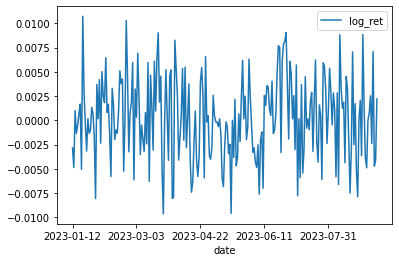

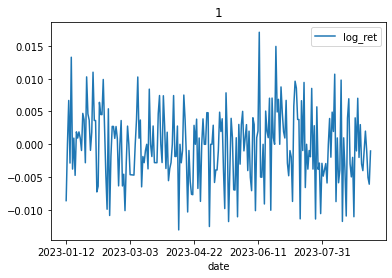

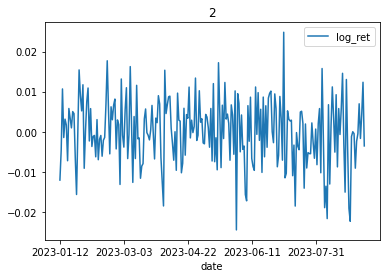

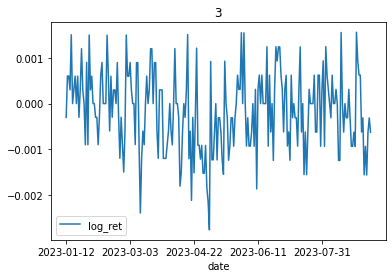

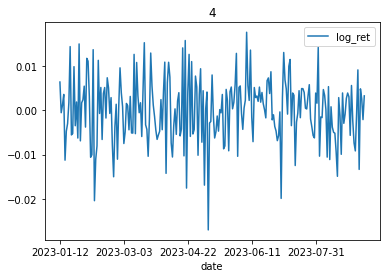

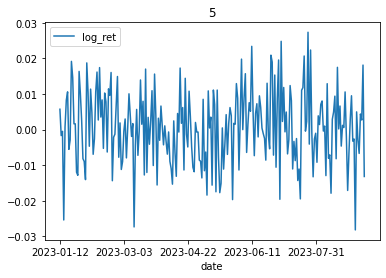

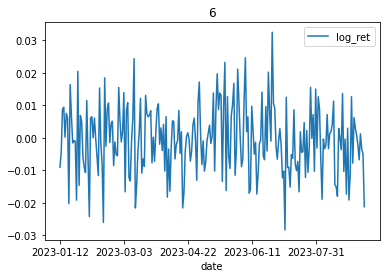

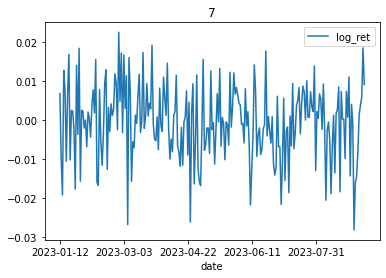

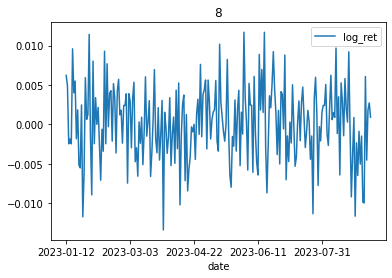

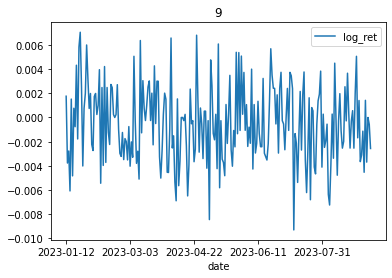

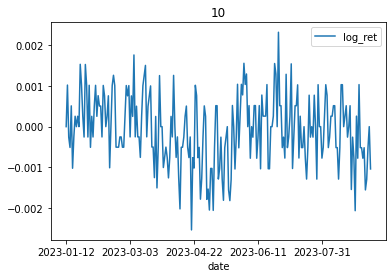

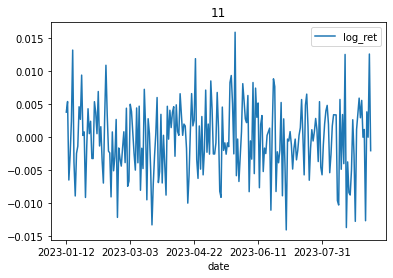

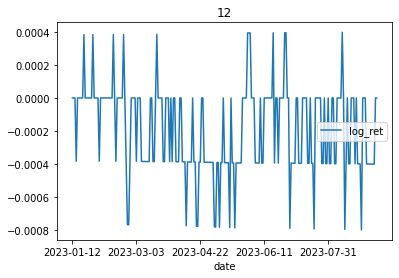

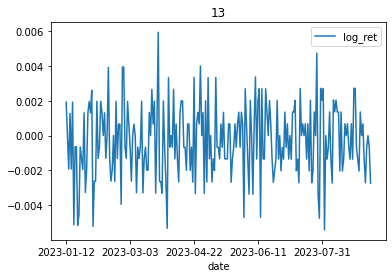

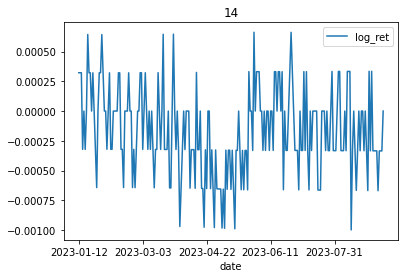

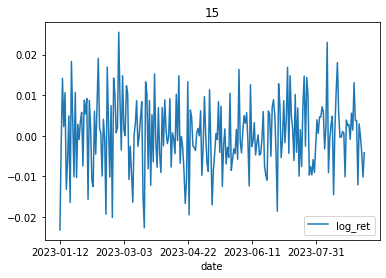

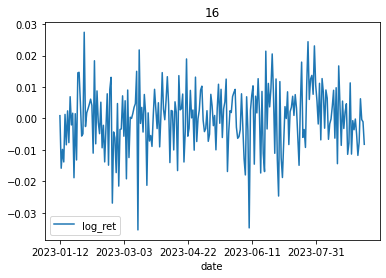

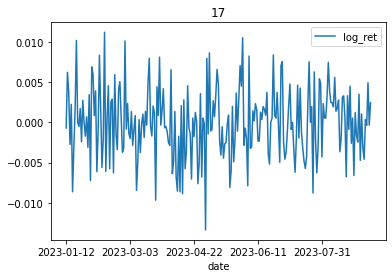

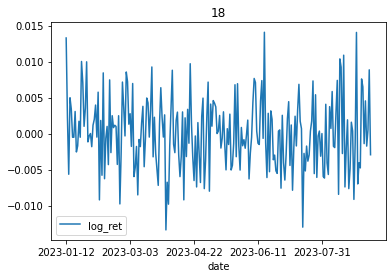

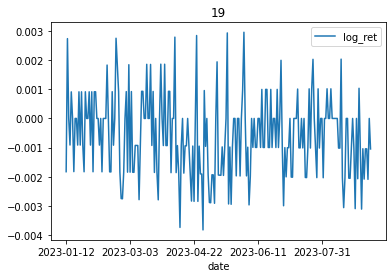

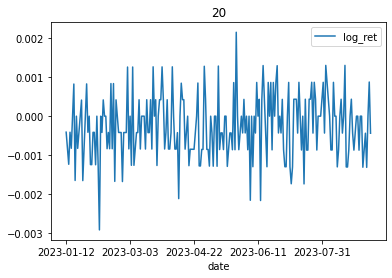

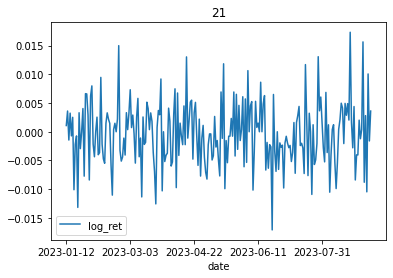

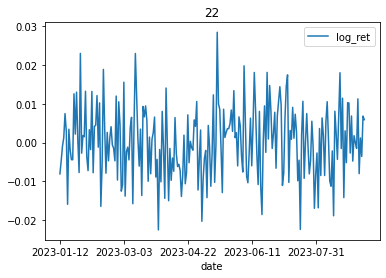

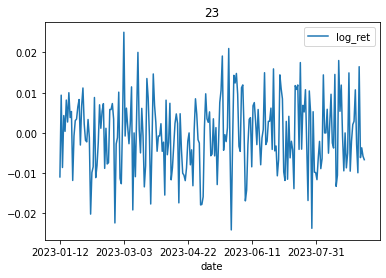

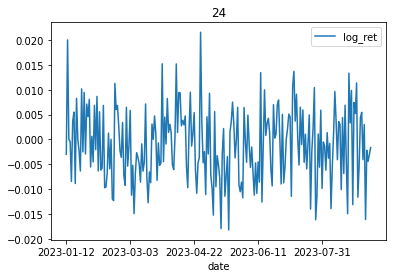

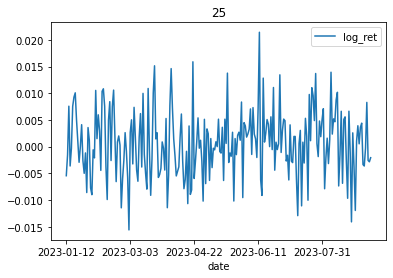

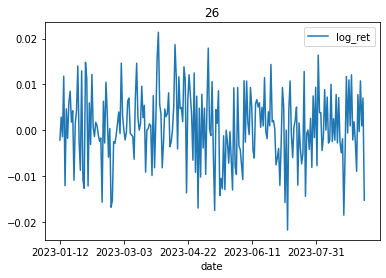

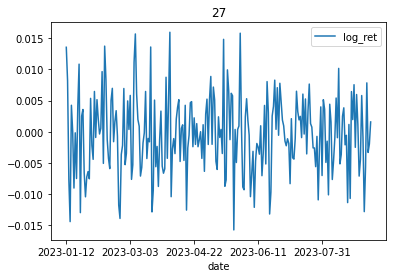

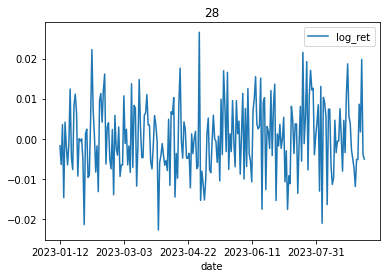

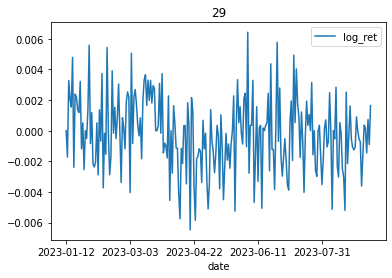

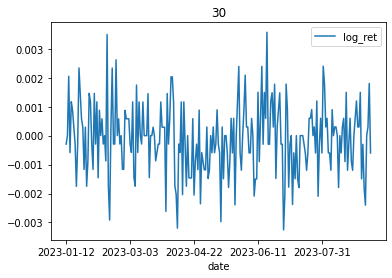

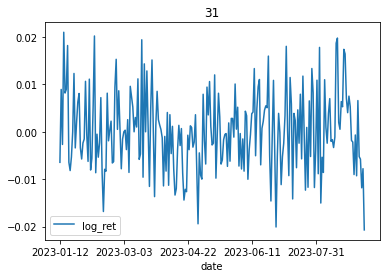

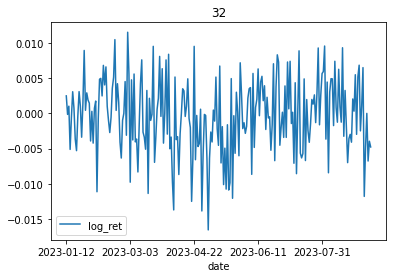

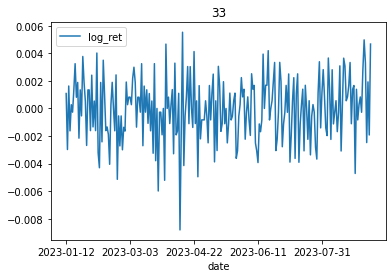

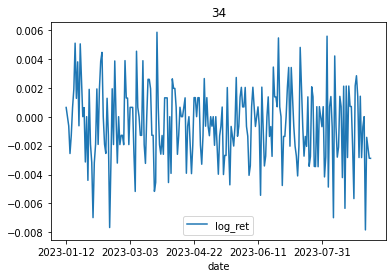

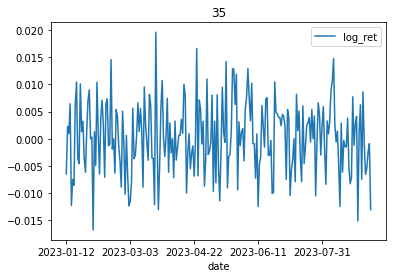

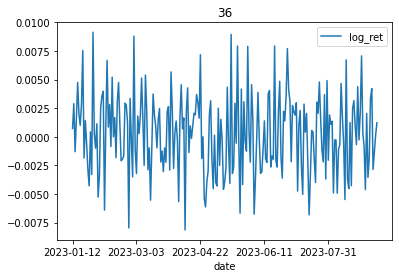

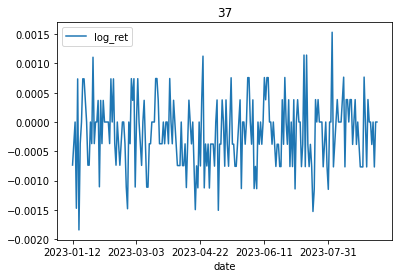

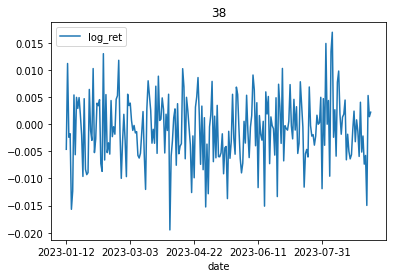

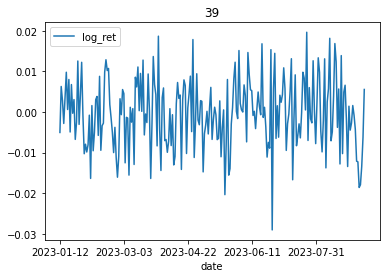

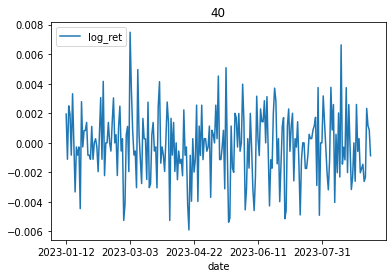

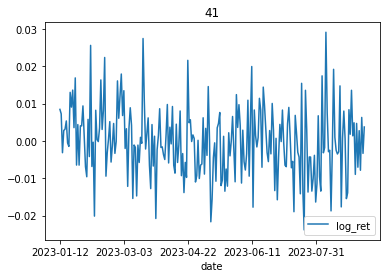

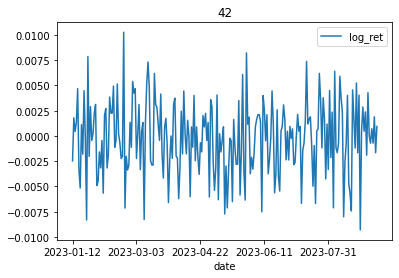

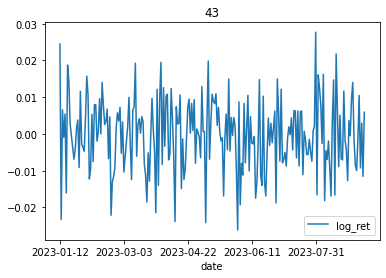

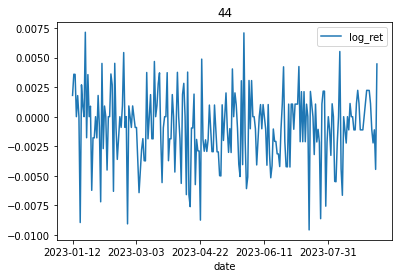

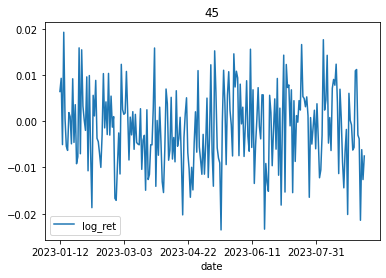

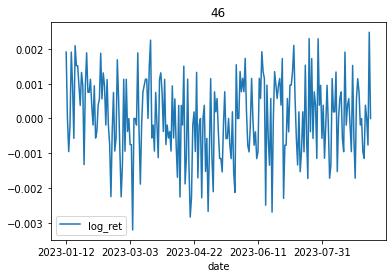

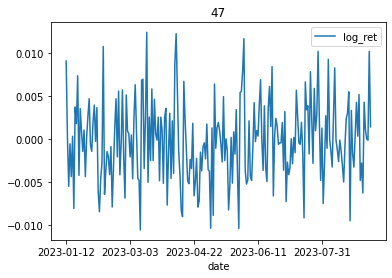

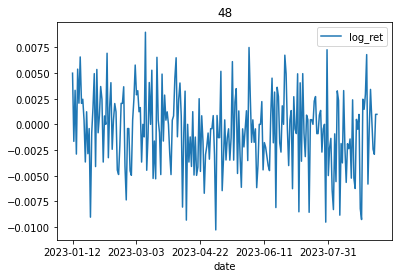

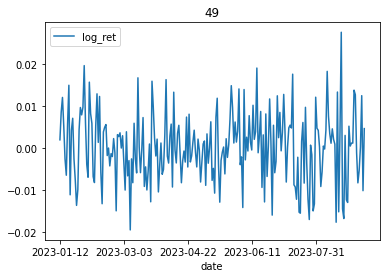

In [11]:
for stock, stock_data in curated_data.groupby('stock'):
    print('Stock', stock)
    stock_data.plot(x='date', y='log_ret', title=stock)